In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [3]:
sns.set_context('poster')
sns.set_style('white')

In [4]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['X', 'P', 's', 'D', 'o']
aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'
e2_color= '#f2f2f2'
eallorder= ['e1','e2', 'e3', 'e4', 'e5', 'e6']
eallpallete = ['#6cf0ba', '#f2f2f2', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']

efcmorder= ['e1','e2', 'e4', 'e5', ]
efcmpallete = ['#6cf0ba', '#f2f2f2',  '#eeb7cb', '#b9d2d8',]

espallete = ['#6cf0ba', '#D55282', '#538B9B']
#  604 #FCC479
#     #ffd7a1
#     #fcb14c
#     MED4 = #62A586
#     9313 #F47681
#     natl #7A9BC8

In [5]:
ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'

espallete = ['#6cf0ba', '#D55282', '#538B9B']

In [6]:
xlsx_fname = '17 strains 4 medias- growth curves.xlsx'

In [7]:
y = pd.read_excel(xlsx_fname, sheet_name=None, index_col=[0,1,2], header=None)

In [8]:
df  = y['SetUp- GroupC'].T

In [9]:
df.head()

0                 NaN             1.0    2.0    3.0    4.0    5.0    6.0   \
1                 NaN             MED4   MED4   MED4   MED4   MED4   MED4   
2                Date       Day  Pro99  Pro99  Pro99   lowN   lowN   lowN   
3 2022-12-19 16:31:00         0  0.172  0.128  0.095    0.1  0.119  0.086   
4 2022-12-20 11:06:00  0.774306   0.22  0.217  0.205  0.039  0.138  0.038   
5 2022-12-21 12:21:00  1.826389  0.399  0.427  0.421  0.061  0.081  0.071   
6 2022-12-22 11:36:00  2.795139  0.648  0.776  0.666  0.043  0.048  0.052   
7 2022-12-24 14:21:00  4.909722  2.065  2.165   2.06  0.133  0.084  0.099   

0      7.0       8.0   ...      55.0      56.0      57.0       58.0  \
1      MED4      MED4  ...   MIT0609   MIT0609   MIT0609    MIT0609   
2 lowP(1:8) lowP(1:8)  ... lowP(1:8) lowP(1:8) lowP(1:8) lowP(1:50)   
3     0.167     0.182  ...     0.222     0.241     0.154      0.135   
4     0.196     0.237  ...      0.21     0.264     0.162      0.162   
5     0.281     0.316  ...      0.11     0.085     0.134      0.143   
6     0.506     0.511  ...     0.119     0.157     0.124      0.258   
7     1.388       1.4  ...     0.384      0.34     0.205      0.283   

0       59.0       60.0      61.0     62.0         63.0          64.0  
1    MIT0609    MIT0609   negctrl  negctrl      negctrl       negctrl  
2 lowP(1:50) lowP(1:50) (-) Pro99 (-) lowN (-) lowP 1:8 (-) lowP 1:50  
3      0.187      0.191    -0.005        0         0.01         0.015  
4      0.162      0.194         0    0.024        0.024        -0.005  
5      0.204      0.153    -0.014        0         0.01         0.014  
6      0.249      0.176     0.019        0       -0.005         0.019  
7      0.305      0.259         0    0.014        0.009         0.019  

[5 rows x 66 columns]

In [10]:
id_vars = [i for i in df.columns if i[2] in ['Day', 'Date']]
id_vars
df = df.melt(id_vars=id_vars, var_name=['sample', 'strain', 'media']).rename(columns={i : i[2] for i in id_vars})
df

,Date,Day,sample,strain,media,value
0,2022-12-19 16:31:00,0,1.0,MED4,Pro99,0.172
1,2022-12-20 11:06:00,0.774306,1.0,MED4,Pro99,0.22
2,2022-12-21 12:21:00,1.826389,1.0,MED4,Pro99,0.399
3,2022-12-22 11:36:00,2.795139,1.0,MED4,Pro99,0.648
4,2022-12-24 14:21:00,4.909722,1.0,MED4,Pro99,2.065
...,...,...,...,...,...,...
891,2022-12-30 19:19:00,11.116667,64.0,negctrl,(-) lowP 1:50,-0.005
892,2022-12-31 18:36:00,12.086806,64.0,negctrl,(-) lowP 1:50,-0.01
893,2023-01-01 13:07:00,12.858333,64.0,negctrl,(-) lowP 1:50,0.014
894,2023-01-02 11:52:00,13.80625,64.0,negctrl,(-) lowP 1:50,-0.019


In [11]:
id_vars

[(nan, nan, 'Date'), (nan, nan, 'Day')]

In [12]:
def _process(k,d):
    df = d.T
    id_vars = [i for i in df.columns if i[2] in ['Day', 'Date']]
    mdf = df.melt(id_vars=id_vars, var_name=['Sample', 'strain', 'media'], value_name='FL'
                 ).rename(columns={i : i[2] for i in id_vars})
    mdf['sheet_name'] = k
    
    return mdf

df = pd.concat([_process(k, y[k]) for k in y])

In [13]:
gmap = {  '(-) Pro99': 'Pro99',
       '(-) lowN' : 'lowN', '(-) lowP 1:8' : 'lowP(1:8)', '(-) lowP 1:50' :  'lowP(1:50)', }
for i,j in gmap.items():
    df.loc[df.media.isin([i]), 'media'] = j

In [14]:
df.Sample.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76.])

In [15]:
df = df.rename(columns={'Day': 'day'})

In [16]:
df.dtypes

Date          datetime64[ns]
day                   object
Sample               float64
strain                object
media                 object
FL                    object
sheet_name            object
dtype: object

In [17]:
df['group_sample'] = (df['sheet_name'] + (df['Sample']).astype('string')).astype('object')

In [18]:
df = df.reset_index(drop=True)

In [19]:
df.dtypes

Date            datetime64[ns]
day                     object
Sample                 float64
strain                  object
media                   object
FL                      object
sheet_name              object
group_sample            object
dtype: object

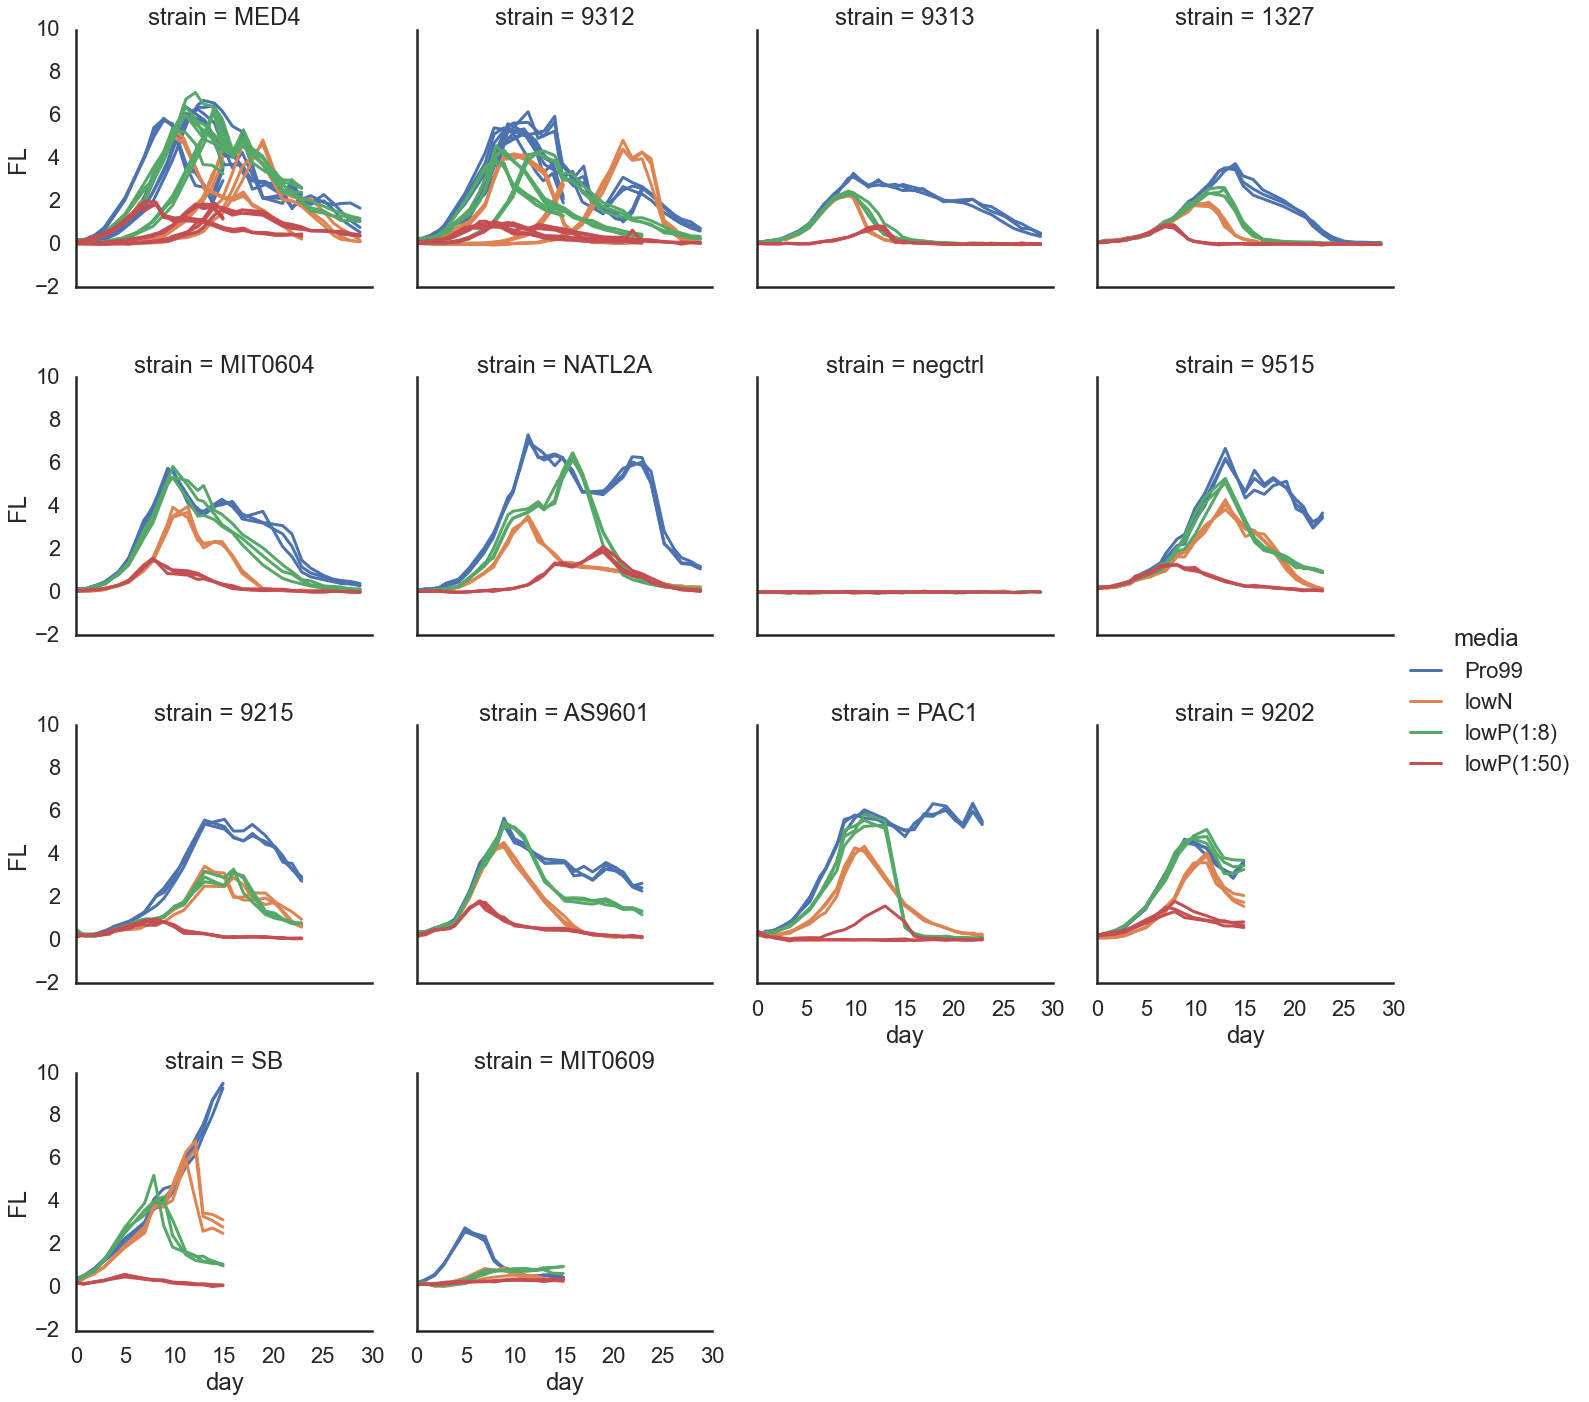

In [20]:
sns.relplot(
    data=df,
    x='day', y='FL',
    col='strain', hue='media',
    kind='line',
    col_wrap=4,
    units='group_sample', estimator=None,
    #units='sheet_name', estimator=None,
           )

In [33]:
def calculate_lag(d):
    minday_fl_threshold = 0.1
    r2_threshold = 0.9
    reg = None 
    intercept = None
    coef = None
    r2 = -1000 
    L = None
    maxday = None
    maxFL = None

    d = d.reset_index(drop=True)
    if d.shape[0] > 2:
        maxindex = d.FL.idxmax()
        maxday = d.loc[maxindex]['day']
        maxFL = d.loc[maxindex]['FL']
        minday = d.loc[(d.day < maxday) & (d.FL <= minday_fl_threshold), 'day'].max()
        if minday is np.NaN:
            minday = d.day.min()

        minday = min(maxday-7,minday)
        dfit = d.loc[(d.day > minday) & (d.day <= maxday)]
        if dfit.shape[0] > 2:
            reg, intercept, coef, r2 = cp.fit_regression(dfit, 'day', 'logFL')

            L = maxday - ((d.loc[maxindex]['logFL'] - d.loc[0]['logFL']) / coef)
    return pd.Series({
         'maxday' : maxday,
#         'minday' : minday,
         'maxFL' : maxFL,
#         'logFL0' : d.loc[0]['logFL'],
#         'log10FL0' : np.log10(d.loc[0]['FL']),
        'intercept': intercept,
        'Growth Rate': coef,
        'r2': r2,
        'Lag' : L,
    })

def get_prev_max_day_df(d, minmaxday_threshold):
    d = d.reset_index(drop=True)
    if d.shape[0] < 3:
        return None
    
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    maxdaysdf = d.loc[(d.FL > d.FL.shift()) & (d.FL > d.FL.shift(-1)) & 
                    (d.day < maxday)].reset_index(drop=True)
    if maxdaysdf.shape[0] > 0:
        newmaxindex = maxdaysdf.FL.idxmax()
        newmaxday = maxdaysdf.loc[newmaxindex]['day']

        if ((newmaxday is not np.NaN) and #(newmaxday >= minmaxday_threshold) and 
            (d.loc[d.day == newmaxday, 'FL'].max() > (d.FL.max() / 2))):
            df_prevmax = d.loc[d.day < newmaxday]
            return df_prevmax
    return None

def get_no_outlier_df(d, minday_fl_threshold):
    d_no_outlier = d.loc[(d.FL > minday_fl_threshold) | 
                         (d.FL.shift() < minday_fl_threshold*2) |
                         (d.FL.shift(-1) < minday_fl_threshold*2)
                        ]
    return d_no_outlier

def get_without_max_df(d):
    d = d.reset_index(drop=True)
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    d_withoutmaxday = d.loc[d.day < maxday]
    return d_withoutmaxday

def get_decline_df(d):
    d = d.reset_index(drop=True)
    maxindex = d.FL.idxmax()
    maxday = d.loc[maxindex]['day']
    d_withoutmaxday = d.loc[d.day > maxday]
    return d_withoutmaxday

def get_decline_rate(d):
    minday_fl_threshold = 0.1
    r2_threshold = 0.9
    reg = None 
    intercept = None
    coef = None
    r2 = -1000 
    L = None
    maxday = None
    maxFL = None

    d = d.reset_index(drop=True)
    if d.shape[0] > 2:
        maxindex = d.FL.idxmax()
        maxday = d.loc[maxindex]['day']
        maxFL = d.loc[maxindex]['FL']

        dfit = d.loc[(d.day >= maxday)]
        if dfit.shape[0] > 2:
            reg, intercept, coef, r2 = cp.fit_regression(dfit, 'day', 'logFL')

    return pd.Series({
        'decline_intercept': intercept,
        'Decline Rate': -coef,
        'decline r2': r2,
    })

def get_df_list(d, minday_fl_threshold, minmaxday_threshold):
    df_list = [d]
    try:
        dnomax = get_without_max_df(d)
        df_list.append(dnomax)
        dnomax2 = get_without_max_df(dnomax)
        df_list.append(dnomax2)
        df_list1 = df_list.copy()
        for x in df_list1:
            df_list.append(get_no_outlier_df(x, minday_fl_threshold))
    except Exception:
        pass

    return df_list

def calculate_lag_wrap(d):
    minday_fl_threshold = 0.07
    minmaxday_threshold = 4
    df_list = get_df_list(d, minday_fl_threshold, minmaxday_threshold)
    d2 = get_prev_max_day_df(d,minmaxday_threshold)
    if d2 is not None:
        df_list.extend(get_df_list(d2, minday_fl_threshold, minmaxday_threshold))
    reslist = [calculate_lag(x) for x in df_list]

    sorted_reslist = sorted(reslist, key=lambda x : x['r2'], reverse=True)
    print('.', end='')
    result = sorted_reslist[0]           
    
    maxindex = d.FL.idxmax()
    result['maxday'] = d.loc[maxindex]['day']
    result['maxFL'] = d.loc[maxindex]['FL']
    #result = pd.concat([result, get_decline_rate(get_decline_df(d))])

    return result           

In [34]:
def computeL(maxday, maxlogcells, logcells0, coef):
    L = maxday - ((maxlogcells - logcells0) / coef)
    return L


In [35]:
def computeMaxDay(maxlogcells, logcells0, coef, L):
    maxday = ((maxlogcells - logcells0) / coef) + L
    return maxday


In [36]:
df.columns

Index(['Date', 'day', 'Sample', 'strain', 'media', 'FL', 'sheet_name',
       'group_sample', 'logFL'],
      dtype='object')

In [37]:
df.dropna(axis=0, subset=['FL'], inplace=True)

In [38]:
df['FL'] = pd.to_numeric(df['FL'])

In [39]:
df['FL'] = np.clip(df['FL'], a_min=0.04, a_max=None)

In [40]:
df['logFL'] = np.log(df['FL'])

In [41]:
df.isna().sum()

Date            0
day             0
Sample          0
strain          0
media           0
FL              0
sheet_name      0
group_sample    0
logFL           0
dtype: int64

In [51]:
df.columns

Index(['Date', 'day', 'Sample', 'strain', 'media', 'FL', 'sheet_name',
       'group_sample', 'logFL'],
      dtype='object')

In [52]:
lagsdf = df.groupby([ 'sheet_name', 'Sample', 'strain', 'media']).apply(calculate_lag_wrap)\
        .reset_index()

........................................................................................................................................................................................................................

In [53]:
lagsdf.head()

,sheet_name,Sample,strain,media,maxday,maxFL,intercept,Growth Rate,r2,Lag
0,SetUp- GroupB,1.0,MED4,Pro99,10.902083,5.989,-1.871409,0.375347,0.990271,-0.455513
1,SetUp- GroupB,2.0,MED4,Pro99,10.902083,6.483,-1.887717,0.385016,0.991479,0.998998
2,SetUp- GroupB,3.0,MED4,Pro99,10.902083,6.149,-1.944924,0.392236,0.992010,1.090977
3,SetUp- GroupB,4.0,MED4,lowN,9.920139,5.346,-1.730104,0.361882,0.994344,-0.326317
4,SetUp- GroupB,5.0,MED4,lowN,9.920139,5.044,-1.966631,0.395185,0.992524,0.346457


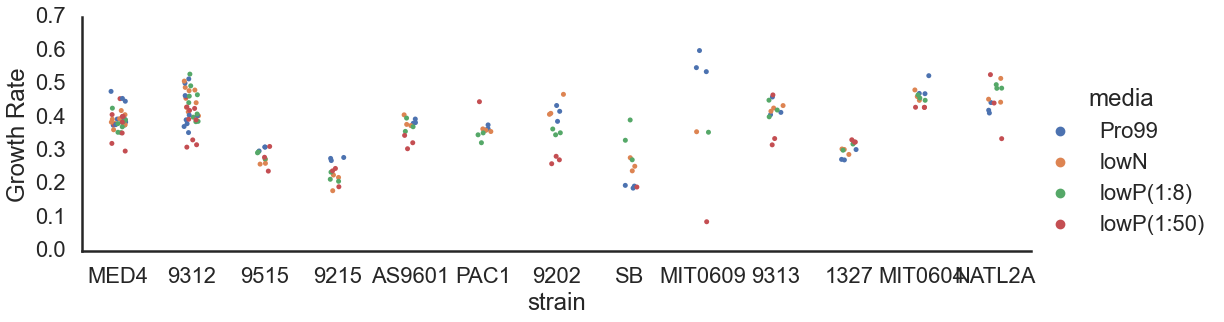

In [55]:
sns.catplot(data=lagsdf.loc[lagsdf.r2 > 0.9],
            y='Growth Rate',
            x='strain', hue='media',
            aspect=3
           )

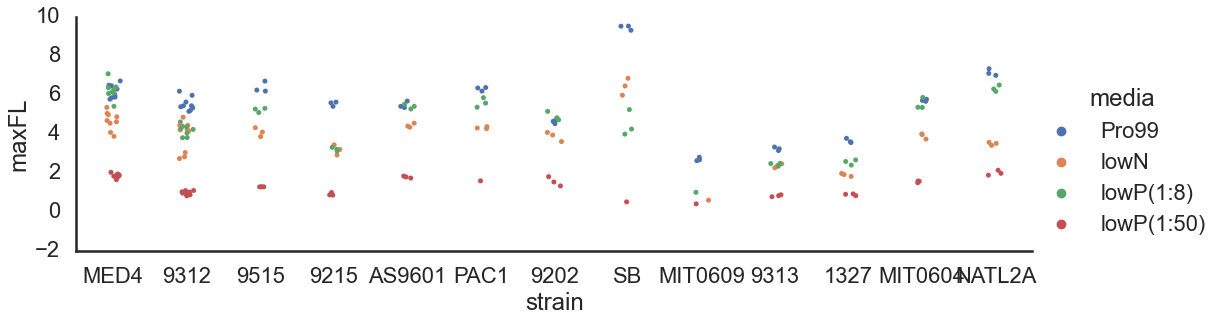

In [56]:
sns.catplot(data=lagsdf.loc[lagsdf.r2 > 0.9],
            y='maxFL',
            x='strain', hue='media',
            aspect=3
           )

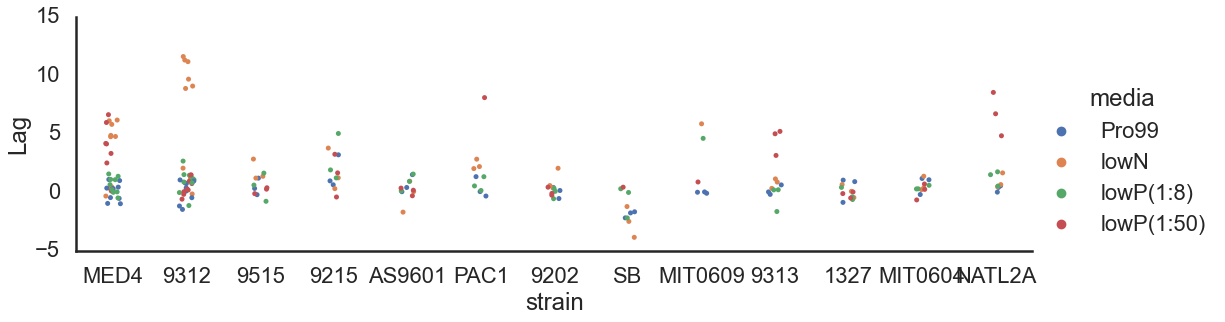

In [58]:
sns.catplot(data=lagsdf.loc[lagsdf.r2 > 0.9],
            y='Lag',
            x='strain', hue='media',
            aspect=3
           )

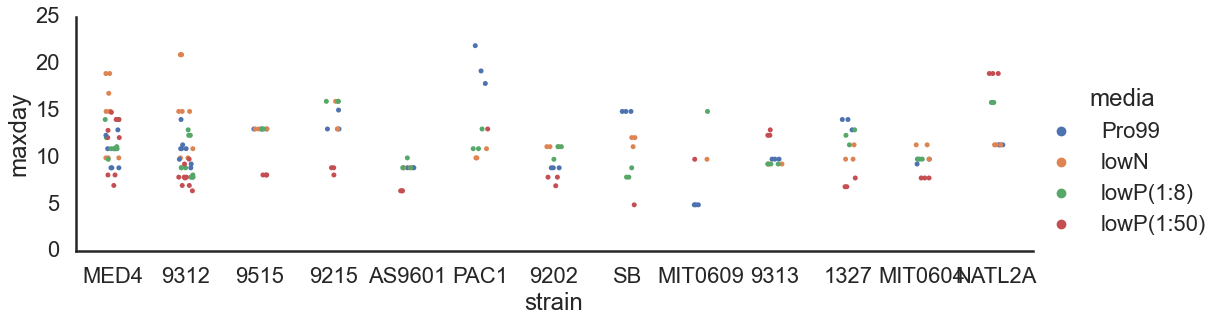

In [59]:
sns.catplot(data=lagsdf.loc[lagsdf.r2 > 0.9],
            y='maxday',
            x='strain', hue='media',
            aspect=3
           )

In [57]:
lagsdf.to_excel('yara_growth_rates.xlsx')

In [46]:
lagsdf.describe()

,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag
count,216.000000,216.000000,216.000000,207.000000,207.000000,216.000000,207.000000
mean,36.722222,10.894895,3.590917,-2.452913,0.359201,-40.742743,1.379848
std,21.197996,4.240837,2.183581,1.325883,0.103810,200.483607,2.749049
min,1.000000,0.000000,0.040000,-8.489908,0.006692,-1000.000000,-3.850200
25%,18.750000,8.859722,1.705750,-2.901696,0.302799,0.973305,0.030441
50%,36.500000,10.902083,3.899500,-2.077812,0.380015,0.986957,0.550208
75%,54.250000,13.005556,5.386750,-1.659454,0.427725,0.992601,1.529483
max,76.000000,27.821528,9.515000,-0.358970,0.598623,0.999757,16.788820


In [47]:
lagsdf.nlargest(20, 'maxFL')

,sheet_name,Sample,maxday,maxFL,intercept,Growth Rate,r2,Lag
112,SetUp- GroupC,37.0,14.879861,9.515,-0.373054,0.193444,0.965330,-1.763923
113,SetUp- GroupC,38.0,14.879861,9.510,-0.358970,0.195585,0.960364,-1.667898
114,SetUp- GroupC,39.0,14.879861,9.301,-0.392660,0.187353,0.967760,-2.187981
202,SetUp-GroupA,63.0,11.311806,7.332,-2.217652,0.411893,0.980449,0.550208
201,SetUp-GroupA,62.0,11.311806,7.092,-2.497134,0.443236,0.994610,0.413831
84,SetUp- GroupC,9.0,12.086806,7.071,-1.700262,0.354323,0.984919,-0.485414
200,SetUp-GroupA,61.0,11.311806,6.992,-2.417994,0.420251,0.978591,0.011771
115,SetUp- GroupC,40.0,12.086806,6.839,-0.817346,0.252731,0.975170,-1.217855
140,SetUp-GroupA,1.0,12.912500,6.705,-2.304971,0.377064,0.983031,0.438948
26,SetUp- GroupB,27.0,13.005556,6.696,-1.654784,0.310038,0.993028,-0.207184


In [ ]:
sns.relplot(data=df.loc[df.Sample == ' MED4 lowP (1:50) 3'],
            x='day', y='logFL', kind='line')

In [48]:
lagsdf.Sample.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76.])

In [ ]:
lagsdf.rename(columns={'Growth Rate'  : 'Growth_Rate'}, inplace=True)

In [ ]:
from statsmodels.formula.api import ols
for p in ['9313', 'MED4']:
    for col in ['maxFL', 'Growth_Rate']:
        dfdata = lagsdf.loc[lagsdf.sheet_name.isin(['Secondary exp.']) & lagsdf.PRO.isin([p])]

        mod = ols(f'{col} ~ C(S)',
                data=dfdata).fit()
        #print (f'++++++++++++++++++ day = {d} +++++++++++++++++++++++')
        print(f'+++++++++++++++++++++ {p} {col} as function of sample')
        print(mod.summary())
        print(sm.stats.anova_lm(mod))
        print(f'+++++++++++++++++++++ {p} {col} as function of sample')
        pair_t = mod.t_test_pairwise("C(S)", method='b')
        print(pair_t.result_frame)
        print(f'+++++++++++++++++++++++ {p} {col} as function of sample')
        print(pair_t.result_frame.loc[pair_t.result_frame['reject-b'], 'pvalue-b'])
        #aov_table = sm.stats.anova_lm(mod, typ=2)
        #print(aov_table)